# Diagnostic Test Analysis — Understanding Student Needs from Day One  

This notebook presents a detailed analysis of the diagnostic.  
It aims to:  
1. Identify students’ gaps in key mathematical areas  
2. Define targeted strategies to address them

The diagnostic test was designed to evaluate core mathematical competencies at the beginning of the school year.  
It helps teachers make informed decisions based on actual data rather than general impressions.

This document can also serve as a guide for teachers interested in using data to improve their teaching from the very start.



## 📦 Importing Required Libraries

We begin by importing the Python libraries needed for data manipulation and visualization.


In [2]:
# Data handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


## 📥 Loading Student Results Data

We will now load the diagnostic test results from an Excel file located in the `data/` folder.


In [4]:
# Load each class separately
df_a = pd.read_excel("../data/1APIC3.xlsx")
df_b = pd.read_excel("../data/1APIC4.xlsx")
df_c = pd.read_excel("../data/1APIC5.xlsx")

# Add class labels to each
df_a["Class"] = "Class 1 APIC 3"
df_b["Class"] = "Class 1 APIC 4"
df_c["Class"] = "Class 1 APIC 5"

# Combine all for overall analysis
df_all = pd.concat([df_a, df_b, df_c], ignore_index=True)

## 📑 Test Structure & Data Explanation

The diagnostic test was designed to assess students' fundamental skills in **algebra**, **geometry**, and **problem-solving**. It consisted of six exercises as outlined below:

- **Exercise 1**: Classification of Numbers
  - Students were asked to classify numbers into three categories: integers, decimals, or fractions.
  
- **Exercise 2**: Arithmetic Operations on Different Types of Numbers
  - This exercise tested the ability to perform basic arithmetic operations (addition, subtraction, multiplication, and division) on integers, decimals, and fractions.
  
- **Exercise 3**: Ordering Numbers
  - Students needed to arrange a series of numbers (integers, decimals, and fractions) in ascending or descending order.
  
- **Exercise 4**: Differentiating Between a Line Segment and a Ray
  - This geometry exercise tested students' understanding of geometric figures by asking them to distinguish between a line segment and a ray.
  
- **Exercise 5**: Calculating Measurements of Regular Shapes
  - Students were asked to calculate basic measurements (like perimeter and area) of regular geometric shapes such as squares and triangles.
  
- **Exercise 6**: Proportionality and Percentage Problem
  - The final exercise applied proportionality and percentages in a real-world problem-solving context.
---

### 🔹 Dataset Columns Explanation:
The dataset consists of the following columns:
- **ID Élève**: The unique identifier for each student (name replaced for data protection).
- **Exercice 1 - Algebra**: The score for the first exercise related to algebra.
- **Exercice 2 - Algebra**: The score for the second exercise related to algebra.
- **Exercice 3 - Algebra**: The score for the third exercise related to algebra.
- **Exercice 4 - Geometry**: The score for the fourth exercise related to geometry.
- **Exercice 5 - Geometry**: The score for the fifth exercise related to geometry.
- **Exercice 6 - Problem Solving**: The score for the final problem-solving exercise.
- **Total Algèbre**: The total points for all algebra exercises.
- **Total Géométrie**: The total points for all geometry exercises.
- **Total Résolution de Problèmes**: The total points for problem-solving exercises.
- **sexe**: The gender of the student, where "M" stands for Male and "F" stands for Female.

### 🔹 Data Preview
Below is a preview of the dataset structure:


In [13]:
# Display first rows
df_all.head()

,ID Élève,sexe,Exercice 1,Exercice 2,Exercice 3,Total Algèbre,Exercice 4,Exercice 5,Total Géométrie,Exercice 6,Total Résolution de Problèmes,Class
0,1,F,3.0,2.0,1.0,6.0,0.0,2.0,2.0,0.0,0.0,Class 1 APIC 3
1,2,M,1.5,1.0,1.5,4.0,0.0,0.0,0.0,0.0,0.0,Class 1 APIC 3
2,3,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Class 1 APIC 3
3,4,F,3.5,6.0,1.5,11.0,0.0,1.0,1.0,1.0,1.0,Class 1 APIC 3
4,5,F,3.5,3.0,1.5,8.0,0.0,2.0,2.0,0.0,0.0,Class 1 APIC 3


## 👥 Class Demographics Analysis

In this section, we analyze the structure of the student population across the three classes that took the diagnostic test. The goal is to understand the distribution of students by class and by gender (Boys and girls).

We calculate:
- The total number of students in each class.
- The number of male and female students in each class.
- Overall totals across all classes.

This information helps identify potential gender imbalances and ensures a fair and inclusive analysis.

In [15]:
# Create a summary list
summary = []

# Loop through each class and collect data
for name, df in {
    '1 APIC 3': df_a,
    '1 APIC 4': df_b,
    '1 APIC 5': df_c
}.items():
    total = len(df)
    males = (df['sexe'] == 'M').sum()
    females = (df['sexe'] == 'F').sum()
    summary.append([name, males, females, total])

# Add total row
total_all = sum(row[3] for row in summary)
total_males = sum(row[1] for row in summary)
total_females = sum(row[2] for row in summary)
summary.append(['Total', total_males, total_females, total_all])

# Create DataFrame
df_summary = pd.DataFrame(summary, columns=['Class', 'Males', 'Females', 'Total'])

# Display the table
df_summary.style.hide(axis="index")


Class,Males,Females,Total
1 APIC 3,17,14,31
1 APIC 4,20,11,31
1 APIC 5,18,13,31
Total,55,38,93


### Gender Distribution per Class (Donut Chart)

To better understand the gender composition in each class, we visualize the number of male and female students using a donut chart. This type of visualization helps highlight the proportion of each gender clearly and is useful for identifying potential imbalances that could influence group dynamics or learning approaches.


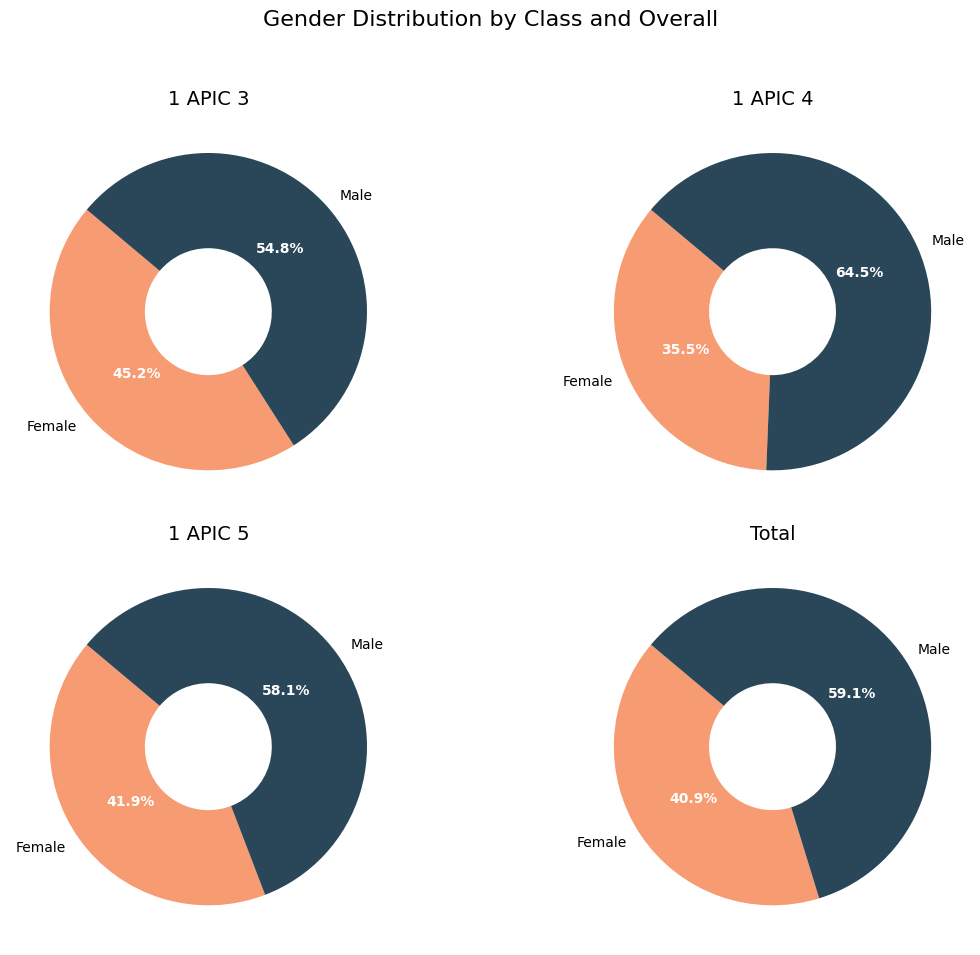

In [7]:
# List of DataFrames for each class
class_data = [df_a, df_b, df_c, df_all]
class_names = ['1 APIC 3', '1 APIC 4', '1 APIC 5', 'Total']

# Define plot style
colors = ['#F79B72', '#2A4759']
labels = ['Female', 'Male']

# Create 2x2 subplot figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten to easily iterate

# Generate donut plots
for i, (df, title) in enumerate(zip(class_data, class_names)):
    counts = df['sexe'].value_counts()
    values = [counts.get('F', 0), counts.get('M', 0)]

    wedges, texts, autotexts = axes[i].pie(
        values,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=140,
        wedgeprops={'width': 0.6}
    )
        
    axes[i].set_title(f'{title}', fontsize=14)
    plt.setp(autotexts, size=10, weight='bold', color='white')

# Hide unused subplot if needed (in case less than 4)
if len(class_data) < 4:
    for j in range(len(class_data), 4):
        fig.delaxes(axes[j])

# Add overall title and layout adjustments
plt.suptitle('Gender Distribution by Class and Overall', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Analyzing Student Attendance

Next, we look at **student attendance during the diagnostic test** by identifying missing data (NaN values) in the result sheets. These missing values typically correspond to students who were **absent** during the test. We summarize this data per class and overall, and visualize it using a grouped bar chart showing:

- The **total number of students** enrolled per class.
- The **number of present students** (i.e., those who submitted complete test data).

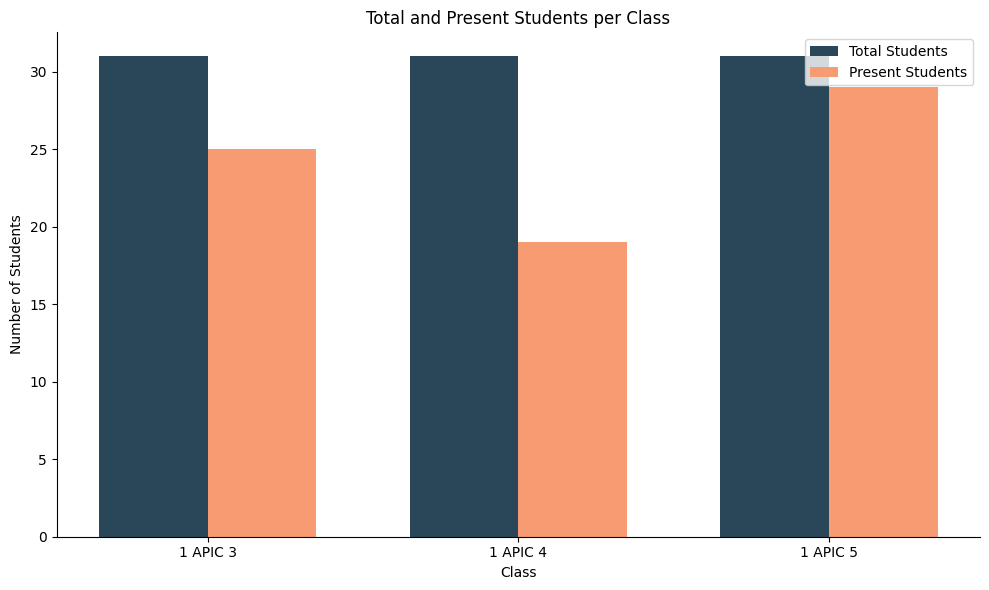

In [8]:
# Count total and present students per class
def count_attendance(df):
    total = len(df)
    present = df.dropna().shape[0]  # rows without any NaN
    return total, present

totals_apic1_3 = count_attendance(df_a)
totals_apic1_4 = count_attendance(df_b)
totals_apic1_5 = count_attendance(df_c)

# Labels for classes
labels = ['1 APIC 3', '1 APIC 4', '1 APIC 5']
total_entries = [totals_apic1_3[0], totals_apic1_4[0], totals_apic1_5[0]]
non_nan_counts = [totals_apic1_3[1], totals_apic1_4[1], totals_apic1_5[1]]

# Set up the bar plot
x = range(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')
ax.bar(x, total_entries, width, label='Total Students', color='#2A4759')
ax.bar([p + width for p in x], non_nan_counts, width, label='Present Students', color='#F79B72')

# Styling

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Class')
ax.set_ylabel('Number of Students')
ax.set_title('Total and Present Students per Class')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


### **Feedback on the Classes Structure**

Upon analyzing the **gender distribution** across the three classes, we observe a consistent trend: **the number of boys exceeds the number of girls** in all three classes. This might suggest a gender imbalance in the classroom composition, which could be useful information when planning differentiated teaching strategies or group activities.

Moreover, regarding **student attendance**, the data indicates that the number of **absent students** is quite low in each class. This is a positive sign, indicating that most students were present for the diagnostic test. The low number of absentees suggests a high level of student engagement and commitment, which is crucial for accurate assessment of their skills and abilities at the start of the year. Therefore, this dataset seems to reflect our classes perfectly, giving us a reliable foundation for further analysis and action.

This analysis provides valuable insight into the composition and engagement of the students, helping us make informed decisions about targeted interventions and teaching methods. 

---


## 📊 General Analysis of Student Scores

In this section, we analyze the overall performance of students across the three classes that took the diagnostic test. Our objectives are to:

- Calculate the **average score** for each class.
- Compute the **total score** for each class and across all classes.
- Compare the **performance between the classes**.
- Visualize **score distributions** to observe how student results are spread out and identify patterns or disparities.


In [5]:
df_a['Total'] = df_a['Total Algèbre'] + df_a['Total Géométrie'] + df_a['Total Résolution de Problèmes']
df_b['Total'] = df_b['Total Algèbre'] + df_b['Total Géométrie'] + df_b['Total Résolution de Problèmes']
df_c['Total'] = df_c['Total Algèbre'] + df_c['Total Géométrie'] + df_c['Total Résolution de Problèmes']

# 1. Average and Total Score Calculation
def compute_scores(df, label):
    total_score = df['Total'].sum(skipna=True)
    average_score = df['Total'].mean(skipna=True)
    return {'class': label, 'total': total_score, 'average': average_score}

results = [
    compute_scores(df_a, '1 APIC 3'),
    compute_scores(df_b, '1 APIC 4'),
    compute_scores(df_c, '1 APIC 5')
]

# Combine results into a DataFrame
df_scores = pd.DataFrame(results)

# Compute global scores
all_scores = pd.concat([df_a['Total'], df_b['Total'], df_c['Total']], ignore_index=True)
total_global = all_scores.sum(skipna=True)
average_global = all_scores.mean(skipna=True)
df_scores.loc[len(df_scores.index)] = ['Total', total_global, average_global]


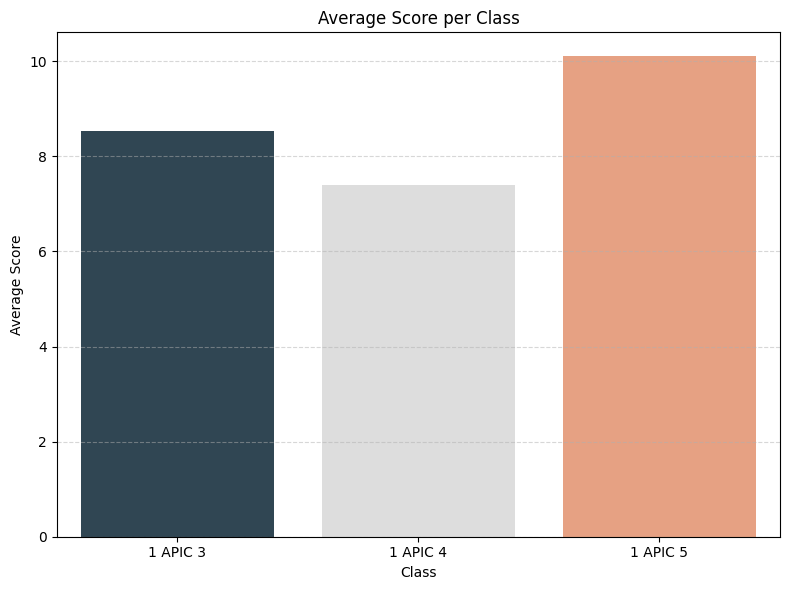

In [11]:
# 2. Bar plot for average scores
colors = [ '#2A4759', '#DDDDDD', '#F79B72']
plt.figure(figsize=(8, 6), facecolor='none')
sns.barplot(data=df_scores[:-1], x='class', y='average', hue='class', palette=colors, legend=False )
plt.title('Average Score per Class')
plt.xlabel('Class')
plt.ylabel('Average Score')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

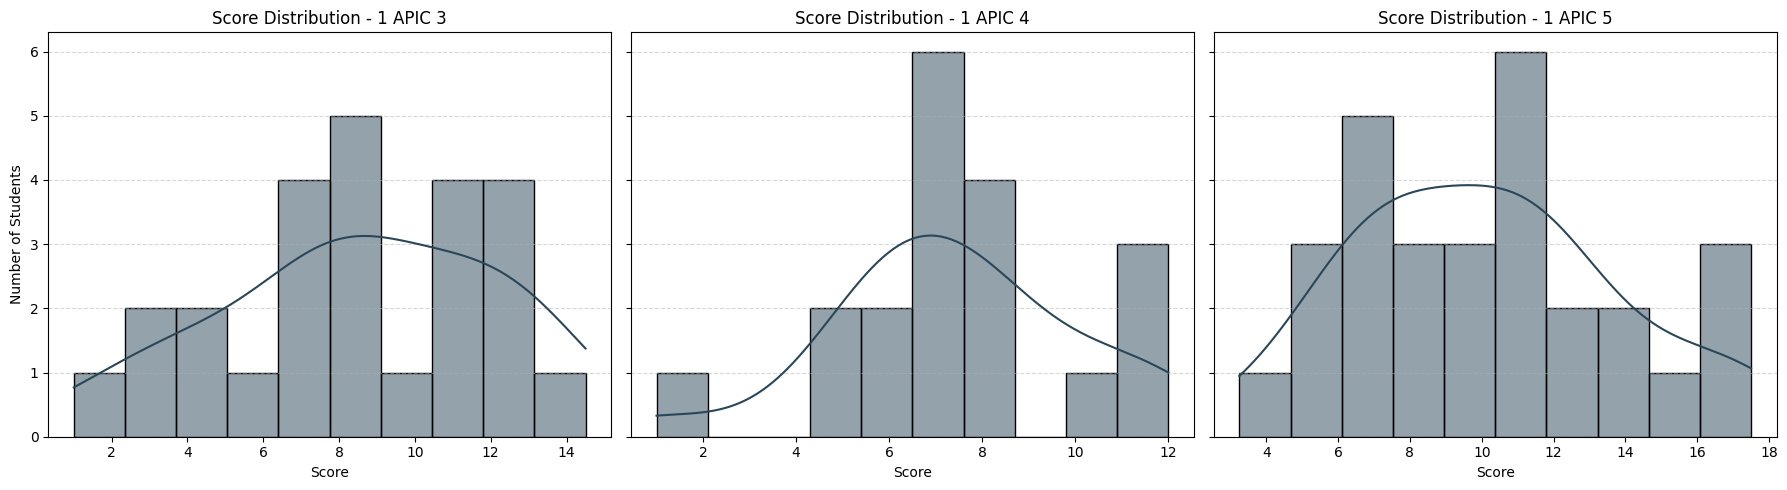

In [14]:
# 3. Score Distribution per Class
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True, facecolor='none')
classes = [('1 APIC 3', df_a), ('1 APIC 4', df_b), ('1 APIC 5', df_c)]

for ax, (label, df) in zip(axes, classes):
    sns.histplot(df['Total'], bins=10, kde=True, ax=ax, color='#2A4759')
    ax.set_title(f'Score Distribution - {label}')
    ax.set_xlabel('Score')
    ax.set_ylabel('Number of Students')
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### 📈 Score Distribution and Class Comparison

From the analysis of the score distribution across the three classes, we can draw the following insights:

- **1 APIC 5** has the **highest average score** among the three classes. The students in this class show a **wide range of performance**, from very low to very high scores. However, **most students are clustered around the mid-range**, indicating a generally balanced level with a few outliers on both ends.

- **1 APIC 3** comes in **second in terms of average score**. The distribution of student performance in this class clearly reflects **three distinct groups**: low-performing, average, and high-performing students. This diversity in levels can be useful for designing differentiated instruction.

- **1 APIC 4** has the **lowest average score**. However, the students scores are more **uniform and concentrated around a specific range**. Apart from a small number of **very good** and **very weak** students, **most of the class falls within a single performance group**, suggesting a more homogeneous level overall.

This comparison helps us better understand the strengths and challenges of each class and can guide targeted pedagogical strategies.

---


### 📊 Algebra Results Analysis

In this section, we will analyze student performance in **algebra** using two main approaches:

1. **Average Score Comparison Across Classes**  
   We will compare the average scores of each class for every algebra exercise to highlight performance differences between the groups.

2. **Competency Analysis by Algebra Skill**  
   For each exercise, we will calculate the percentage of students who reached the required mastery level. This will help us identify which algebra concepts are well understood and which need further reinforcement.

The goal of this analysis is to gain insight into students' strengths and weaknesses in algebra and use that information to guide targeted support and instruction.


In [16]:
# Define algebra exercise columns
algebra_cols = ['Exercice 1', 'Exercice 2', 'Exercice 3 ']  # adjust if more

# Function to get per-class average for algebra exercises
def class_algebra_summary(df, class_name): 
    means = df[algebra_cols].mean()
    return pd.DataFrame({'Exercise': means.index, class_name: means.values})

# 1. Calculate averages for each class
summary_a = class_algebra_summary(df_a, '1 APIC 3')
summary_b = class_algebra_summary(df_b, '1 APIC 4')
summary_c = class_algebra_summary(df_c, '1 APIC 5')

# Merge summaries
algebra_summary = summary_a.merge(summary_b, on='Exercise').merge(summary_c, on='Exercise')

# Add general average
algebra_summary['General Average'] = algebra_summary[['1 APIC 3', '1 APIC 4', '1 APIC 5']].mean(axis=1)

# Display the summary as a DataFrame
print("\nAlgebra Summary:\n")
algebra_summary



Algebra Summary:



,Exercise,1 APIC 3,1 APIC 4,1 APIC 5,General Average
0,Exercice 1,2.96,2.473684,2.689655,2.707780
1,Exercice 2,3.28,3.052632,3.827586,3.386739
2,Exercice 3,1.24,1.236842,1.870690,1.449177


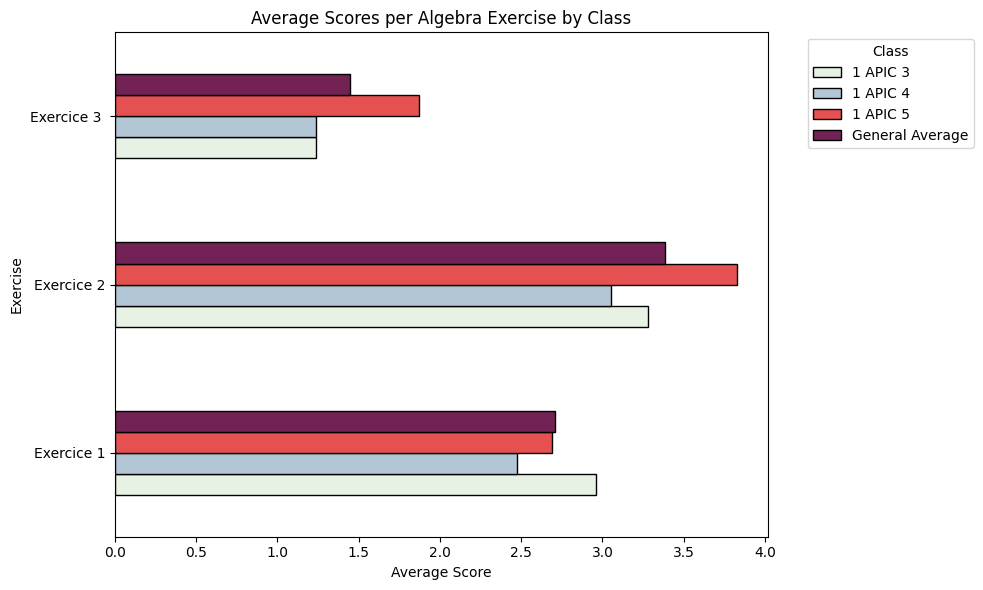

In [36]:
# Set custom colors 
colors = [ '#E7F2E4','#B2C6D5','#E55050' , '#732255'  ]  

# Create horizontal bar plot
ax = algebra_summary.set_index('Exercise').plot(
    kind='barh',
    figsize=(10, 6),
    color=colors,
    edgecolor='black'
)

# Style the plot
plt.title('Average Scores per Algebra Exercise by Class')
plt.xlabel('Average Score')
plt.ylabel('Exercise')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [29]:
# Define algebra columns and mastery thresholds
algebra_cols = ['Exercice 1', 'Exercice 2', 'Exercice 3 ']  # Make sure spacing matches your DataFrame
thresholds = {'Exercice 1': 2.5, 'Exercice 2': 4.5, 'Exercice 3 ': 2.0}

# Function to count competent students
def count_mastery(df, class_name):
    mastery_counts = {}
    for ex in algebra_cols:
        mastery_counts[ex] = (df[ex] >= thresholds[ex]).sum()
    return pd.DataFrame({
        'Exercise': list(mastery_counts.keys()),
        class_name: list(mastery_counts.values())
    })

# 2. Count students who reached the required mastery level
maitrise_a = count_mastery(df_a, '1 APIC 3')
maitrise_b = count_mastery(df_b, '1 APIC 4')
maitrise_c = count_mastery(df_c, '1 APIC 5')

# Merge
maitrise_summary = maitrise_a.merge(maitrise_b, on='Exercise').merge(maitrise_c, on='Exercise')

# Calculate overall percent of competent students (all 3 classes)
total_students = len(df_a) + len(df_b) + len(df_c)
maitrise_summary['Total'] = (
    maitrise_summary[['1 APIC 3', '1 APIC 4', '1 APIC 5']].sum(axis=1)
)
maitrise_summary['Mastery %'] = (
    maitrise_summary['Total'] / total_students * 100
).round(1)

# Show DataFrame
maitrise_summary


,Exercise,1 APIC 3,1 APIC 4,1 APIC 5,Total,Mastery %
0,Exercice 1,20,13,20,53,57.0
1,Exercice 2,7,4,10,21,22.6
2,Exercice 3,5,6,15,26,28.0


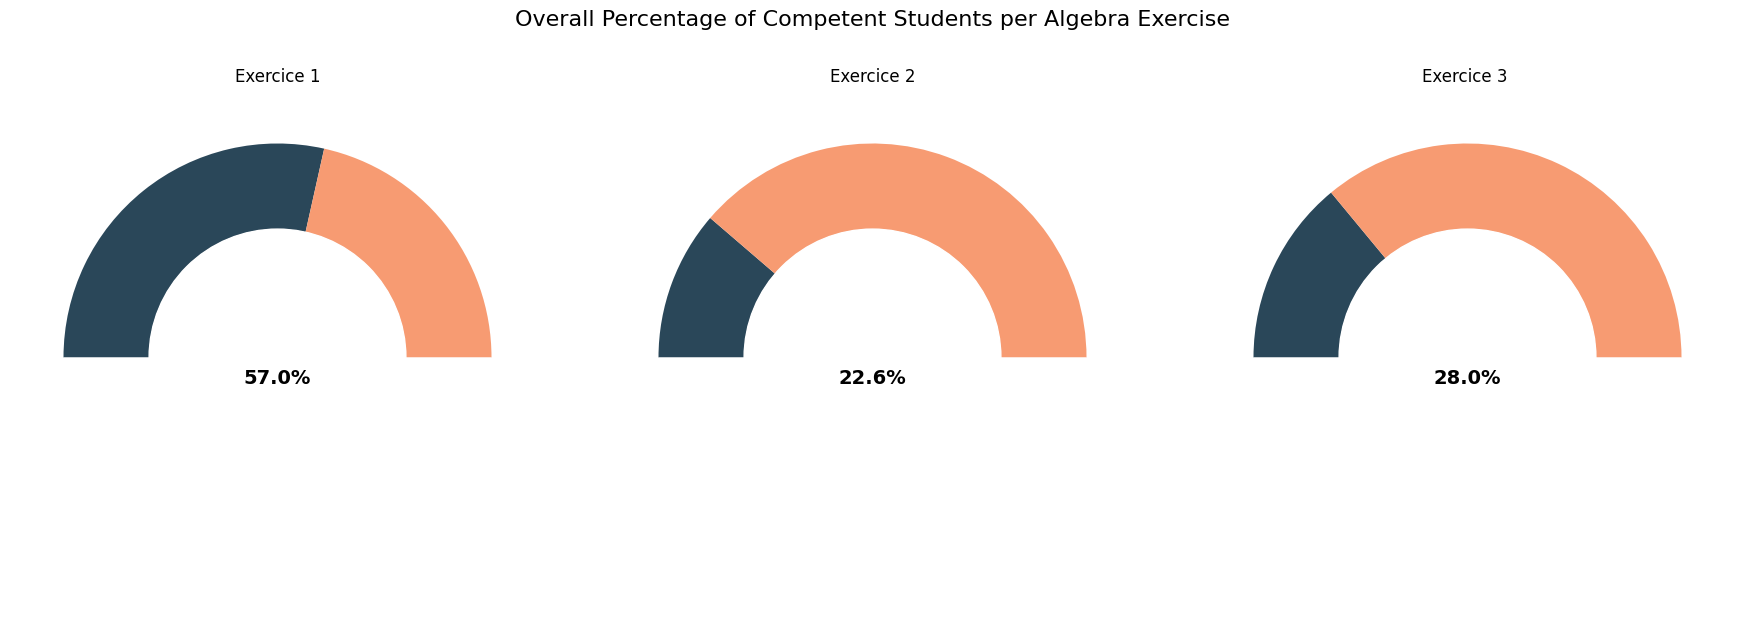

In [35]:
# Create half-donut chart per exercise
fig, axes = plt.subplots(1, 3, figsize=(18, 6), dpi=100)

# Define colors
donut_colors = ['#2A4759', '#F79B72', 'white']  # Competent, Not Competent, Hidden

# Loop through each exercise and plot
for i, row in maitrise_summary.iterrows():
    exercise = row['Exercise']
    mastery = row['Mastery %']
    non_mastery = 100 - mastery

    # Data and labels for the pie
    values = [mastery, non_mastery, 100]  # Add 100 to take up bottom half

    ax = axes[i]
    ax.pie(
        values,
        colors=donut_colors,
        startangle=180,
        counterclock=False,
        wedgeprops=dict(width=0.4)
    )

    # Add center circle for donut effect
    centre_circle = plt.Circle((0, 0), 0.6, color='white')
    ax.add_artist(centre_circle)

    # Add percent text in the middle
    ax.text(0, -0.1, f"{mastery:.1f}%", ha='center', va='center', fontsize=14, fontweight='bold')

    ax.set_title(f"{exercise}", fontsize=12)

# Overall title
plt.suptitle("Overall Percentage of Competent Students per Algebra Exercise", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


### 📝 Feedback on Algebra Performance Analysis

As expected, the class **'1 APIC 5'** achieved the **highest average scores** across algebra exercises, while **'1 APIC 4'** consistently recorded the **lowest performance**.

#### 🔍 Mastery Insights per Exercise

- **Exercise 1** *(Classification of Numbers)*:  
  Students were asked to classify numbers into three categories: **integers**, **decimals**, or **fractions**.  
  ➤ *More than half of the students* demonstrated competency in this skill, suggesting a relatively strong grasp of number types.

- **Exercise 2** *(Arithmetic Operations on Different Types of Numbers)*:  
  This exercise tested their ability to carry out **basic operations** (addition, subtraction, multiplication, and division) across number types.  
  ➤ The results show that nearly **three-quarters of students struggled**, indicating a significant gap in procedural fluency.

- **Exercise 3** *(Ordering Numbers)*:  
  Students needed to arrange various numbers in **ascending or descending order**.  
  ➤ Similar to Exercise 2, about **75% of students did not reach mastery**, showing difficulty with comparing and organizing mixed number types.

#### 🧠 Conclusion

There is a **clear need to reinforce conceptual and procedural understanding** in exercises 2 and 3, especially within the lower-performing class (1 APIC 4). A differentiated approach focusing on practice and targeted support could significantly improve student outcomes in these areas.

---


### 📊 Geometry Results Analysis

In this section, we will conduct an analysis of the geometry results across the three classes.  
Our analysis will focus on two main objectives:

1. **Compare the average performance** of each class in the geometry exercises.
2. **Determine the percentage of students who have mastered** each geometry concept.

This will help us identify which areas are well understood and which need further reinforcement.


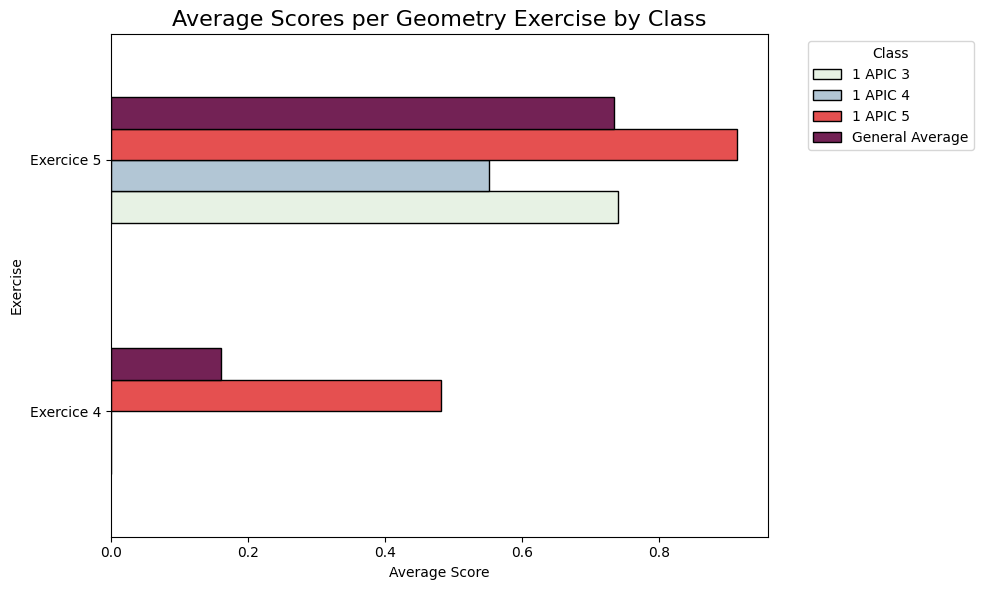

In [37]:
# Define geometry exercise columns
geometry_cols = ['Exercice 4', 'Exercice 5']

# Function to get per-class average for geometry exercises
def class_geometry_summary(df, class_name):
    means = df[geometry_cols].mean()
    return pd.DataFrame({'Exercise': means.index, class_name: means.values})

# 1. Calculate averages for each class
summary_a_g = class_geometry_summary(df_a, '1 APIC 3')
summary_b_g = class_geometry_summary(df_b, '1 APIC 4')
summary_c_g = class_geometry_summary(df_c, '1 APIC 5')

# Merge summaries
geometry_summary = summary_a_g.merge(summary_b_g, on='Exercise').merge(summary_c_g, on='Exercise')

# Add general average
geometry_summary['General Average'] = geometry_summary[['1 APIC 3', '1 APIC 4', '1 APIC 5']].mean(axis=1)


# Set custom colors 
colors = [ '#E7F2E4','#B2C6D5','#E55050' , '#732255'  ]  

# Create horizontal bar plot
ax = geometry_summary.set_index('Exercise').plot(
    kind='barh',
    figsize=(10, 6),
    color=colors,
    edgecolor='black'
)

# Style the plot
plt.title('Average Scores per Geometry Exercise by Class', fontsize=16)
plt.xlabel('Average Score')
plt.ylabel('Exercise')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [39]:
# Define geometry columns and mastery thresholds
geometry_cols = ['Exercice 4', 'Exercice 5']
geometry_thresholds = {
    'Exercice 4': 2, 
    'Exercice 5': 2,

}

# Function to count competent students in geometry
def count_geometry_mastery(df, class_name):
    mastery_counts = {}
    for ex in geometry_cols:
        mastery_counts[ex] = (df[ex] >= geometry_thresholds[ex]).sum()
    return pd.DataFrame({
        'Exercise': list(mastery_counts.keys()),
        class_name: list(mastery_counts.values())
    })

# 2. Count per class
maitrise_g_a = count_geometry_mastery(df_a, '1 APIC 3')
maitrise_g_b = count_geometry_mastery(df_b, '1 APIC 4')
maitrise_g_c = count_geometry_mastery(df_c, '1 APIC 5')

# Merge summaries
maitrise_summary_geometry = maitrise_g_a.merge(maitrise_g_b, on='Exercise').merge(maitrise_g_c, on='Exercise')

# Calculate overall percent of competent students (all 3 classes)
total_students = len(df_a) + len(df_b) + len(df_c)
maitrise_summary_geometry['Total'] = (
    maitrise_summary_geometry[['1 APIC 3', '1 APIC 4', '1 APIC 5']].sum(axis=1)
)
maitrise_summary_geometry['Mastery %'] = (
    maitrise_summary_geometry['Total'] / total_students * 100
).round(1)

# Show DataFrame
maitrise_summary_geometry


,Exercise,1 APIC 3,1 APIC 4,1 APIC 5,Total,Mastery %
0,Exercice 4,0,0,5,5,5.4
1,Exercice 5,5,1,7,13,14.0


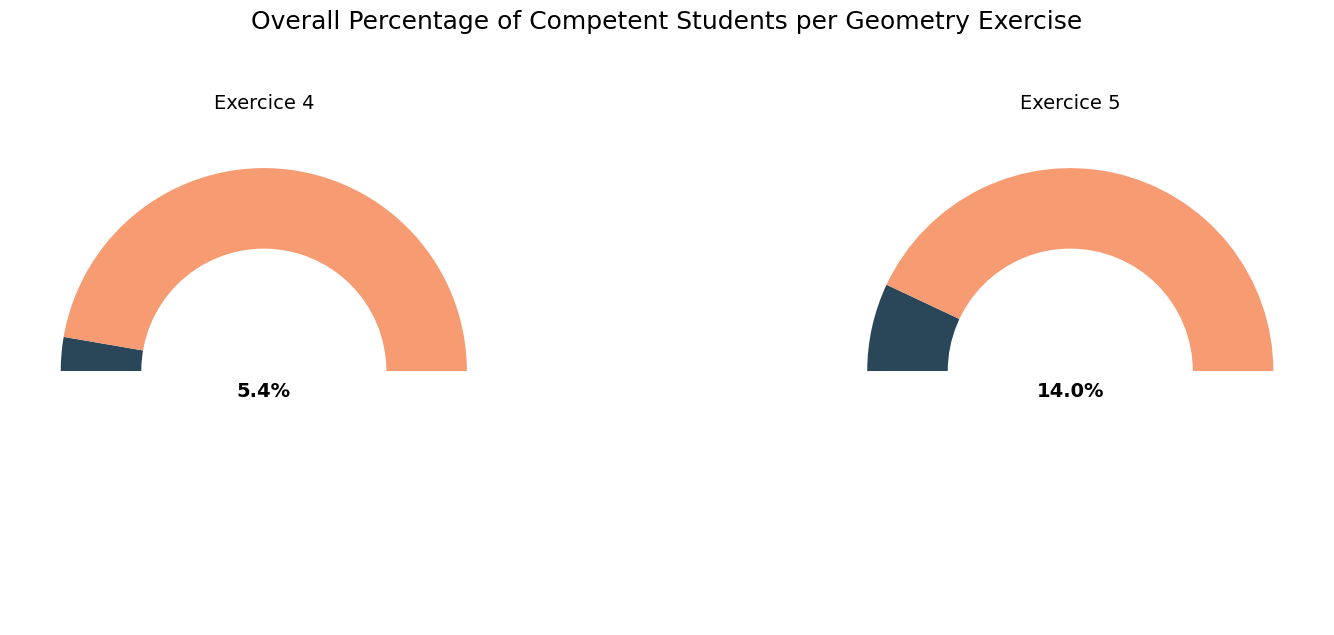

In [45]:
# Create half-donut chart per geometry exercise
fig, axes = plt.subplots(1, 2, figsize=(18, 6), dpi=100)

# Define colors (Competent, Not Competent, Hidden Half)
donut_colors = ['#2A4759', '#F79B72', 'white']  # Green, Orange, White

# Loop through each exercise and plot
for i, row in maitrise_summary_geometry.iterrows():
    exercise = row['Exercise']
    mastery = row['Mastery %']
    non_mastery = 100 - mastery

    # Data and labels for the pie
    values = [mastery, non_mastery, 100]  # Third slice to hide bottom half


    ax = axes[i]
    ax.pie(
        values,
        colors=donut_colors,
        startangle=180,
        counterclock=False,
        wedgeprops=dict(width=0.4)
    )

    # Add center circle for donut effect
    centre_circle = plt.Circle((0, 0), 0.6, color='white')
    ax.add_artist(centre_circle)

    # Add percent text in the middle bottom
    ax.text(0, -0.1, f"{mastery:.1f}%", ha='center', va='center', fontsize=14, fontweight='bold')

    # Add title above each donut
    ax.set_title(f"{exercise}", fontsize=14)

# Overall title
plt.suptitle("Overall Percentage of Competent Students per Geometry Exercise", fontsize=18, y=1.05)
plt.tight_layout()
plt.show()


### 📝 Feedback on Geometry Analysis

As observed in the analysis, the class **1 APIC 5** outperformed the other classes in all geometry exercises.  
However, despite their relative success, **the overall performance across all three classes remains low**, indicating significant difficulties with geometry concepts.

- **Exercise 4** (Differentiating Between a Line Segment and a Ray):  
  While some students showed a basic understanding, performance remained weak overall. This suggests that students struggle to properly distinguish geometric objects in abstract contexts.

- **Exercise 5** (Calculating Measurements of Regular Shapes):  
  This was the most challenging exercise for all classes, with scores **near zero** in some cases.  
  Students had difficulty applying formulas for calculating **perimeter and area** of basic shapes like squares and triangles.

These findings indicate a clear need for **targeted revision and conceptual reinforcement in geometry**, particularly in understanding geometric definitions and solving measurement problems.

---

### 🧮 Analysis of Exercise 6: Proportionality and Percentage Problem

The final exercise aimed to assess students’ ability to apply **proportional reasoning and percentage calculations** in the context of a real-life problem.

This type of task integrates both **algebraic reasoning** and **problem-solving skills**, requiring students to:
- Identify proportional relationships between quantities.
- Perform percentage calculations accurately.
- Understand the context and apply the correct operations accordingly.

In [43]:
# Define the column for Exercise 6 and the mastery threshold 
exercise_col = 'Exercice 6 '
mastery_threshold = 1  # Example threshold score for competency

# Function to count competent students per class
def count_mastery_ex6(df, class_name):
    competent_count = (df[exercise_col] >= mastery_threshold).sum()
    total_students = len(df)
    percent_competent = (competent_count / total_students) * 100 if total_students > 0 else 0
    return {
        'Class': class_name,
        'Competent Students': competent_count,
        'Total Students': total_students,
        'Mastery %': percent_competent
    }

# Compute mastery for each class dataframe 
mastery_a = count_mastery_ex6(df_a, '1 APIC 3')
mastery_b = count_mastery_ex6(df_b, '1 APIC 4')
mastery_c = count_mastery_ex6(df_c, '1 APIC 5')

# Combine into a summary DataFrame
mastery_summary_ex6 = pd.DataFrame([mastery_a, mastery_b, mastery_c])

# Calculate overall mastery percentage (weighted by number of students)
total_students_all = mastery_summary_ex6['Total Students'].sum()
overall_mastery = (mastery_summary_ex6['Competent Students'].sum() / total_students_all) * 100 if total_students_all > 0 else 0


print(f"\nOverall Mastery Percentage (all classes combined): {overall_mastery:.2f}%")
mastery_summary_ex6



Overall Mastery Percentage (all classes combined): 12.90%


,Class,Competent Students,Total Students,Mastery %
0,1 APIC 3,6,31,19.354839
1,1 APIC 4,1,31,3.225806
2,1 APIC 5,5,31,16.129032


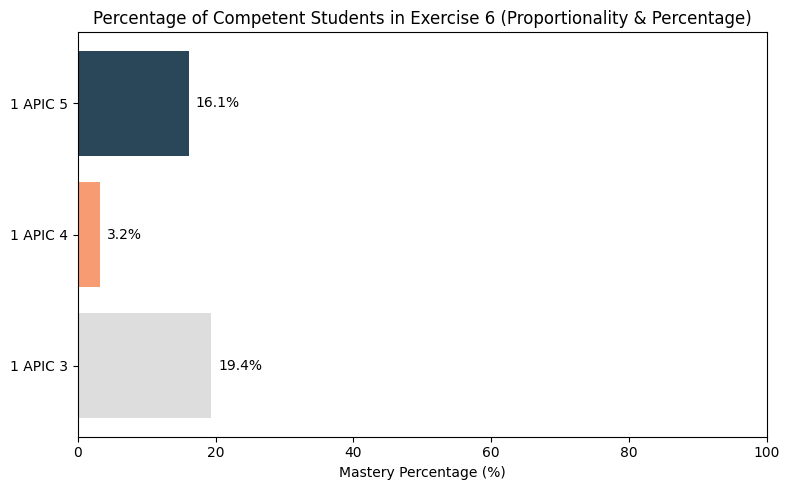

In [44]:
# plot horizontal bar chart of mastery %
plt.figure(figsize=(8, 5))
bars = plt.barh(mastery_summary_ex6['Class'], mastery_summary_ex6['Mastery %'], color=['#DDDDDD', '#F79B72', '#2A4759'])
plt.xlabel('Mastery Percentage (%)')
plt.title('Percentage of Competent Students in Exercise 6 (Proportionality & Percentage)')
plt.xlim(0, 100)

# Add percentage labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', va='center')

plt.tight_layout()
plt.show()

### 📝 Feedback on Exercise 6: Proportionality and Percentage Problem

The results for this exercise reveal that students generally struggle with proportionality and percentage concepts.

- The class **1 APIC 3** leads the performance with nearly **20%** of students mastering this skill.
- In contrast, **1 APIC 4** shows very low mastery, with only about **3%** of students performing well in this exercise.
- Overall, the low mastery percentages across all classes indicate a need for focused teaching and practice on proportional reasoning and percentage calculations.
---

### General Conclusion and Recommendations

The analysis of student performance across algebra and geometry exercises reveals several important insights:

- **Algebra:**  
  The class **1 APIC 5** consistently outperformed the other two classes, showing higher average scores and a greater percentage of students mastering key algebraic skills. However, challenges remain for all classes, especially in Exercises 2 and 3, where many students struggle with arithmetic operations and ordering numbers.

- **Geometry:**  
  Overall performance in geometry is notably lower across all classes, with **1 APIC 5** again leading but with modest mastery percentages. Exercises related to geometric concepts and measurements (like distinguishing line segments from rays and calculating shape measurements) showed particularly weak results, indicating widespread difficulty.

- **Exercise 6 (Problem Solving/Advanced Skills):**  
  Mastery percentages are generally low, highlighting a need to reinforce problem-solving abilities and application of mathematical concepts in more complex contexts.

---

### Recommendations

1. **Focused Remediation:**  
   Targeted review sessions should focus on the algebraic concepts where students showed weaknesses, particularly arithmetic operations and ordering numbers.

2. **Geometry Reinforcement:**  
   Given the low mastery in geometry, it is essential to strengthen foundational geometric understanding and practical skills through hands-on activities, visual aids, and problem-solving exercises.

3. **Differentiated Instruction:**  
   Since class 1 APIC 5 performs better, share effective teaching strategies from this class and adapt instruction to the needs of the other classes.

4. **Continuous Assessment:**  
   Implement frequent low-stakes assessments to monitor progress and adjust teaching methods dynamically.

5. **Encourage Practice:**  
   Provide additional practice materials, especially for the challenging exercises, to build confidence and competence.
